In [1]:
# https://ai.google/tools/datasets/google-facial-expression/
import imageio
import os
import requests
from io import BytesIO
import pandas as pd
from matplotlib import pyplot as plt
from skimage.transform import resize
from tqdm import tqdm_notebook as tqdm
import time
import random
import json
import hashlib

In [2]:
def urlToName(url):
    return os.path.basename(url)

def uniqueName(data, extension='jpg'): 
    # requires to be specialized because this is used in loops
    # data is (file, top, bot, left, right)
    base = hashlib.md5(str(data).encode('utf-8')).hexdigest()
    return f"{base}.{extension}"

def raw_align_image(df, row, col):
    keys = [f'Image{col}', f'Top{col}', f'Bot{col}', f'Left{col}',f'Right{col}']
    data = list(map(lambda key: df[key][row], keys))
    data[0] = urlToName(data[0])
    data = tuple(data)
    return data[0], uniqueName(data)

In [3]:
train_df = pd.read_csv('FEC_dataset/train.csv')
train_df.head()

,Image1,Left1,Right1,Bot1,Top1,Image2,Left2,Right2,Bot2,Top2,...,Anno2_id,Anno2,Anno3_id,Anno3,Anno4_id,Anno4,Anno5_id,Anno5,Anno6_id,Anno6
0,http://farm5.staticflickr.com/4108/5185055338_...,0.142578,0.266602,0.065421,0.297508,http://farm3.staticflickr.com/2127/5765052001_...,0.439490,0.596178,0.289062,0.427734,...,291701,2,321402,2,321501,2,321902,3,322102,2
1,http://farm5.staticflickr.com/4108/5185055338_...,0.142578,0.266602,0.065421,0.297508,http://farm4.staticflickr.com/3543/3387356856_...,0.335938,0.441406,0.130307,0.311859,...,321402,2,321601,3,4295017797,2,4295017896,2,48316,2
2,http://farm5.staticflickr.com/4108/5185055338_...,0.142578,0.266602,0.065421,0.297508,http://farm4.staticflickr.com/3858/14540292875...,0.206442,0.524158,0.078125,0.325195,...,321902,2,322102,1,4295017797,1,4295017896,1,48316,2
3,http://farm5.staticflickr.com/4108/5185055338_...,0.718750,0.826172,0.194704,0.394081,http://farm4.staticflickr.com/3875/14501588548...,0.318665,0.488619,0.162109,0.290039,...,321501,3,321601,3,321902,3,322102,3,48316,2
4,http://farm5.staticflickr.com/4108/5185055338_...,0.718750,0.826172,0.194704,0.394081,http://farm6.staticflickr.com/5143/5693754914_...,0.244141,0.380859,0.175000,0.413235,...,321501,2,321601,3,321902,2,322102,2,41207,2


In [4]:
#get the number of images
ALL_IMAGES = list(train_df['Image1']) + list(train_df['Image2']) + list(train_df['Image3'])

# get unique images
UNIQUE_IMAGES = list(set(ALL_IMAGES))
print(len(UNIQUE_IMAGES))

81260


In [5]:
#download all images
# for url in tqdm(UNIQUE_IMAGES):
#     file_name = f'FEC_dataset/images/{os.path.basename(url)}'
#     #dont download if the file is already there
#     if os.path.exists(file_name): # makes this block re-runnable
#         continue
#     try:
#         image = imageio.imread(url)
#         imageio.imwrite(file_name, image)
#     except Exception as e:
#         pass

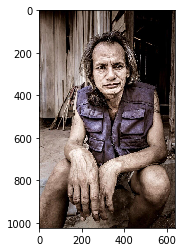

In [6]:
index = random.randint(0,78922)
filename = f"FEC_dataset/images/{urlToName(UNIQUE_IMAGES[index])}"
image = imageio.imread(filename)
plt.imshow(image)

In [7]:
########################################### ALIGN ALL IMAGES! ########################################

# # 1. MAKE ITERABLE
# images = list(train_df['Image1']) + list(train_df['Image2']) + list(train_df['Image3'])
# images = list(map(urlToName, images))

# top = list(train_df['Top1']) + list(train_df['Top2']) + list(train_df['Top3'])
# bot = list(train_df['Bot1']) + list(train_df['Bot2']) + list(train_df['Bot3'])
# left = list(train_df['Left1']) + list(train_df['Left2']) + list(train_df['Left3'])
# right = list(train_df['Right1']) + list(train_df['Right2']) + list(train_df['Right3'])


# S = set(zip(images, top, bot, left, right))
# L = list(S)
# print(len(L))

# # 2. RUN ALONG 
# errors = []
# for item in tqdm(L):
#     try:
#         file,top,bot,left,right = item
#         dst = f'FEC_dataset/formatted/{uniqueName(item)}'
#         image = imageio.imread(f"FEC_dataset/images/{file}")
        
#         h , w = tuple(image.shape[:2])
#         left, right, bot, top = int(w*left),int(w*right), int(h*bot), int(h*top)
#         image = image[bot:top, left:right]
#         imageio.imwrite(dst, image)
    
#     except FileNotFoundError:
#         errors.append(file)
        
# print("Done aligning images!")

In [8]:
########################################### CLEAN CSV FILE! ########################################
train_df = pd.read_csv('FEC_dataset/train.csv')

# get names of files present in storage
exists = set(os.listdir('FEC_dataset/formatted/'))
print(len(exists))

# get the indices of rows to be dropped because there is no file
drop_index = []
m = len(train_df)

cols = [[],[],[]]

for i in tqdm(range(m)):
    files = []
    for j in range(1,4):
        data = list(map(lambda x: train_df[x][i], [f'Image{j}', f'Top{j}', f'Bot{j}', f'Left{j}',f'Right{j}']))
        data[0] = os.path.basename(data[0])
        files.append(uniqueName(tuple(data)))
    if all(file in exists for file in files):
        [cols[j].append(files[j]) for j in range(3)]
    else:
        drop_index.append(i)

backup = train_df.copy()

126761


KeyboardInterrupt: 

In [ ]:
# Verification
print('Verify existence of all files' , end=' ')
print(all(file in exists for file in cols[0]+cols[1]+cols[2]))
print('cols of same height', (len(cols[0])==len(cols[2])==len(cols[2])))
print(f'adding up {m} = {len(drop_index)} + {len(cols[0])}, {m == len(drop_index) + len(cols[0])}')

In [ ]:
# drop rows having images we don't have
print("before dropping", len(train_df))
train_df = train_df.drop(drop_index)
print("After dropping", len(train_df))

In [ ]:
# drop cols
for j in [1,2,3]:
    key = [f'Image{j}', f'Top{j}', f'Bot{j}', f'Left{j}',f'Right{j}']
    train_df = train_df.drop(key, axis=1)

In [ ]:
# add cols
m = len(train_df)
print(m)
for j in [1,2,3]:
    train_df[f'Image{j}'] = cols[j-1]
# save the goddamn file!
train_df.to_csv('FEC_dataset/train_formatted.csv')
train_df.head()

In [ ]:
import random
fig, axs = plt.subplots(1,3, figsize=(15,5))
row = random.randint(0,m)
for col in range(3):
    image = train_df[f'Image{col+1}'][row]
    axs[col].imshow(imageio.imread(f'FEC_dataset/formatted/{image}'))

print("Report:")
print('type:', train_df['Triplet_type'][row])
for i in range(1,7):
    left, right = train_df[f'Anno{i}_id'][row], train_df[f'Anno{i}'][row] 
    print(f' {left}: {right}')

In [ ]:
# open an image pair to show aligning
row = random.randint(0, len(backup))
col = random.choice([1,2,3])

raw, aligned = raw_align_image(backup, row, col)

raw = imageio.imread(f'FEC_dataset/images/{raw}')
aligned = imageio.imread(f'FEC_dataset/formatted/{aligned}')

fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].imshow(raw)
axs[1].imshow(aligned)